In [ ]:
caseID: 집 수리 요청 접수 번호

taskID: 업무

originator: 업무 담당자

eventtype: 업무의 시작(start)과 끝(complete)을 표시. 

contact: 집 수리 요청의 요청 채널.

RepairType: 수리 방식.

objectKey: 수리 대상 집 key.

RepairInternally: 내부 수리 여부.

EstimatedRepairTime: 예상 수리 시간.

RepairCode: 수리 종류.

RepairOK: 수리 정상 종료 여부

Date: 업무 수행 일자

Time: 업무 수행 시각

In [2]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rcParams
from datetime import datetime

In [ ]:
#2022년 1월 1일부터 5월 14일까지 데이터를 불러오기 
link = "https://raw.githubusercontent.com/annsyj94/Short-Data-Analysis-/main/current.csv"
df = pd.read_csv(link)

df.head(5)

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
0,547,InternRepair,Cindy,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,15:44
1,387,SendTicketToFinAdmin,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-02,18:51
2,660,Survey,Barbara,complete,NaN,NaN,NaN,True,120.0,1.0,NaN,2022-01-03,7:57
3,818,Survey,John,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-04,6:25
4,805,SendTicketToFinAdmin,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-05,16:58


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               134 non-null    int64  
 1   taskID               134 non-null    object 
 2   originator           134 non-null    object 
 3   eventtype            134 non-null    object 
 4   contact              8 non-null      object 
 5   RepairType           11 non-null     object 
 6   objectKey            11 non-null     float64
 7   RepairInternally     10 non-null     object 
 8   EstimatedRepairTime  10 non-null     float64
 9   RepairCode           10 non-null     float64
 10  RepairOK             24 non-null     object 
 11  date                 134 non-null    object 
 12  time                 134 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 13.7+ KB


In [ ]:
#NaN 데이터 처리하기 
df[['RepairInternally','RepairOK']] = df[['RepairInternally','RepairOK']].fillna("False")
df[['objectKey','EstimatedRepairTime','RepairCode']] = df[['objectKey','EstimatedRepairTime','RepairCode']].fillna(value = 0)
df['RepairType'] = df['RepairType'].fillna("O")
df['contact']  = df['contact'].fillna("Nope")

df.head(5)


,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
0,547,InternRepair,Cindy,complete,Nope,O,0.0,False,0.0,0.0,False,2022-01-01,15:44
1,387,SendTicketToFinAdmin,System,complete,Nope,O,0.0,False,0.0,0.0,False,2022-01-02,18:51
2,660,Survey,Barbara,complete,Nope,O,0.0,True,120.0,1.0,False,2022-01-03,7:57
3,818,Survey,John,start,Nope,O,0.0,False,0.0,0.0,False,2022-01-04,6:25
4,805,SendTicketToFinAdmin,System,complete,Nope,O,0.0,False,0.0,0.0,False,2022-01-05,16:58


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               134 non-null    int64  
 1   taskID               134 non-null    object 
 2   originator           134 non-null    object 
 3   eventtype            134 non-null    object 
 4   contact              134 non-null    object 
 5   RepairType           134 non-null    object 
 6   objectKey            134 non-null    float64
 7   RepairInternally     134 non-null    object 
 8   EstimatedRepairTime  134 non-null    float64
 9   RepairCode           134 non-null    float64
 10  RepairOK             134 non-null    object 
 11  date                 134 non-null    object 
 12  time                 134 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 13.7+ KB


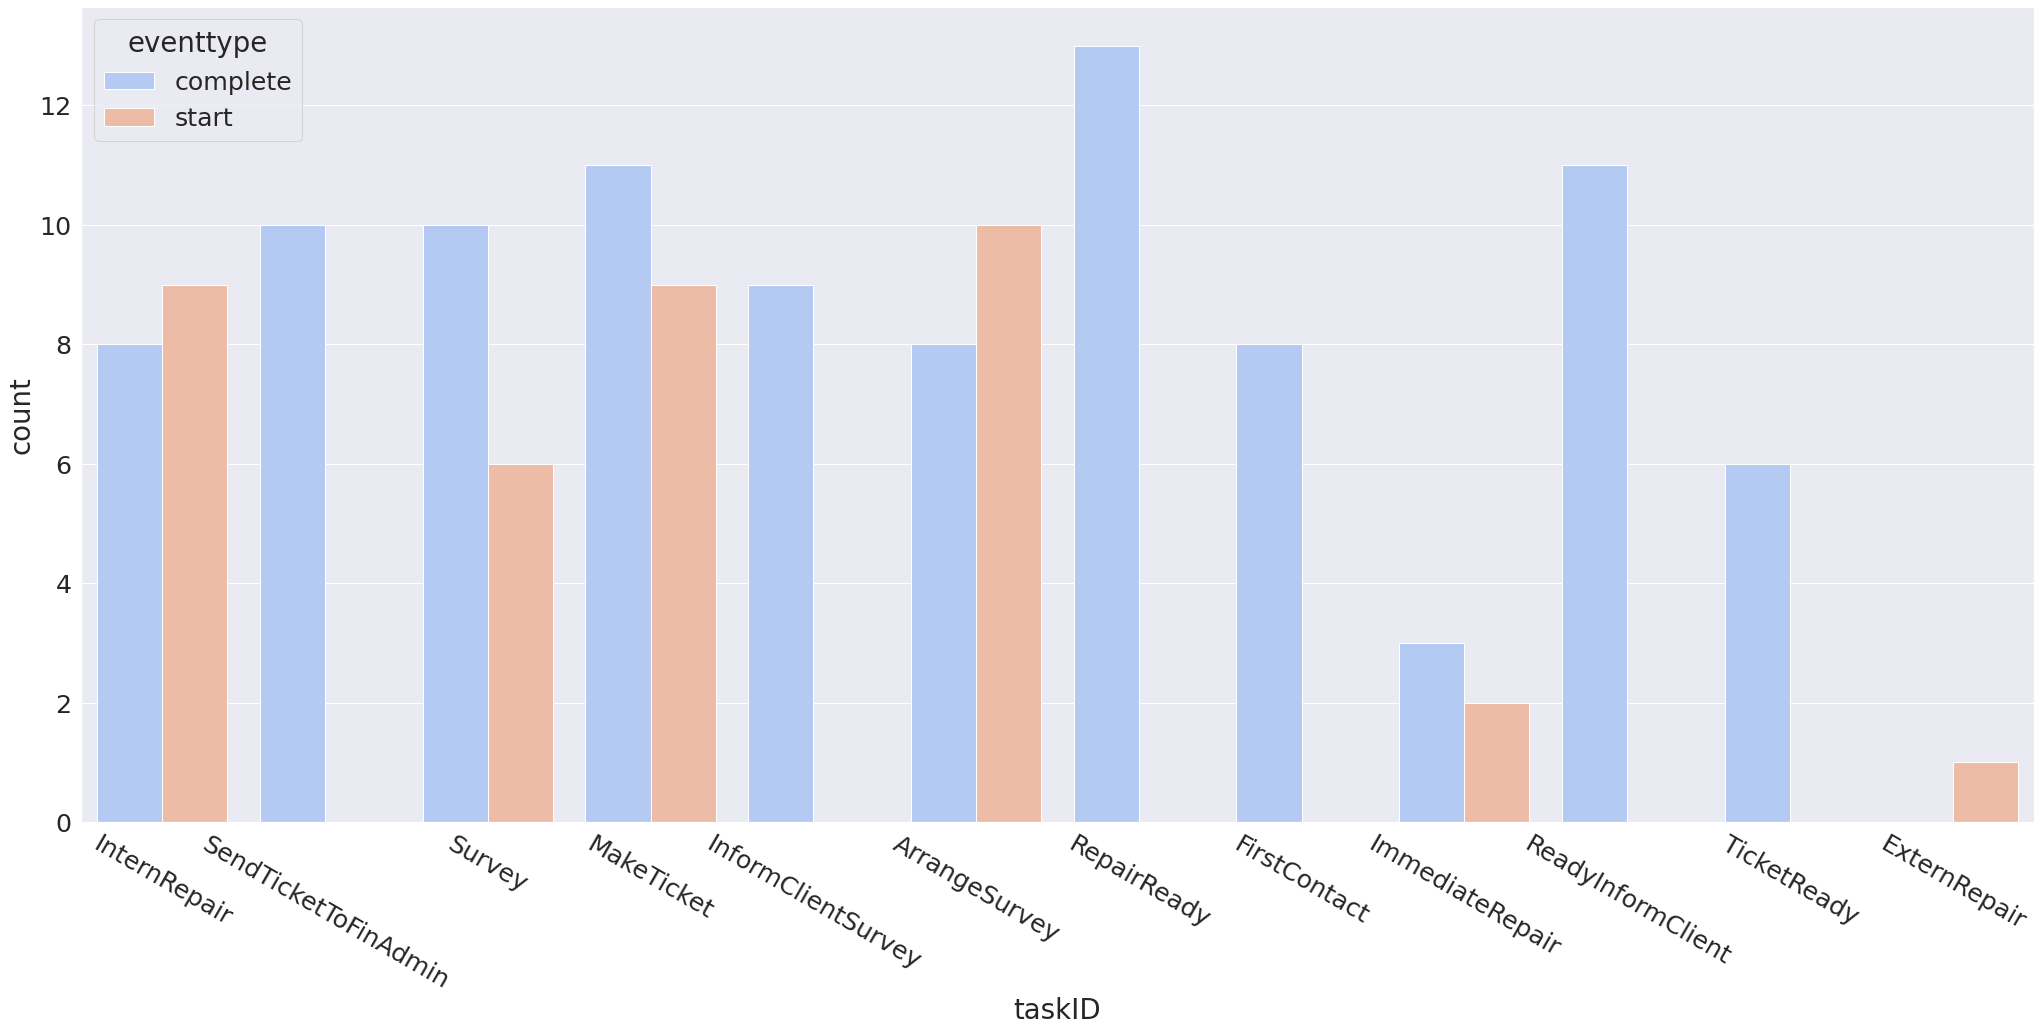

In [ ]:
#업무 ID
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(35,15)},font_scale = 2.3)
plt.xticks(rotation = -30 )
sns.countplot(data=df, x = "taskID", hue = "eventtype", palette = 'coolwarm')
plt.savefig("first.png",dpi=400, bbox_inches='tight')



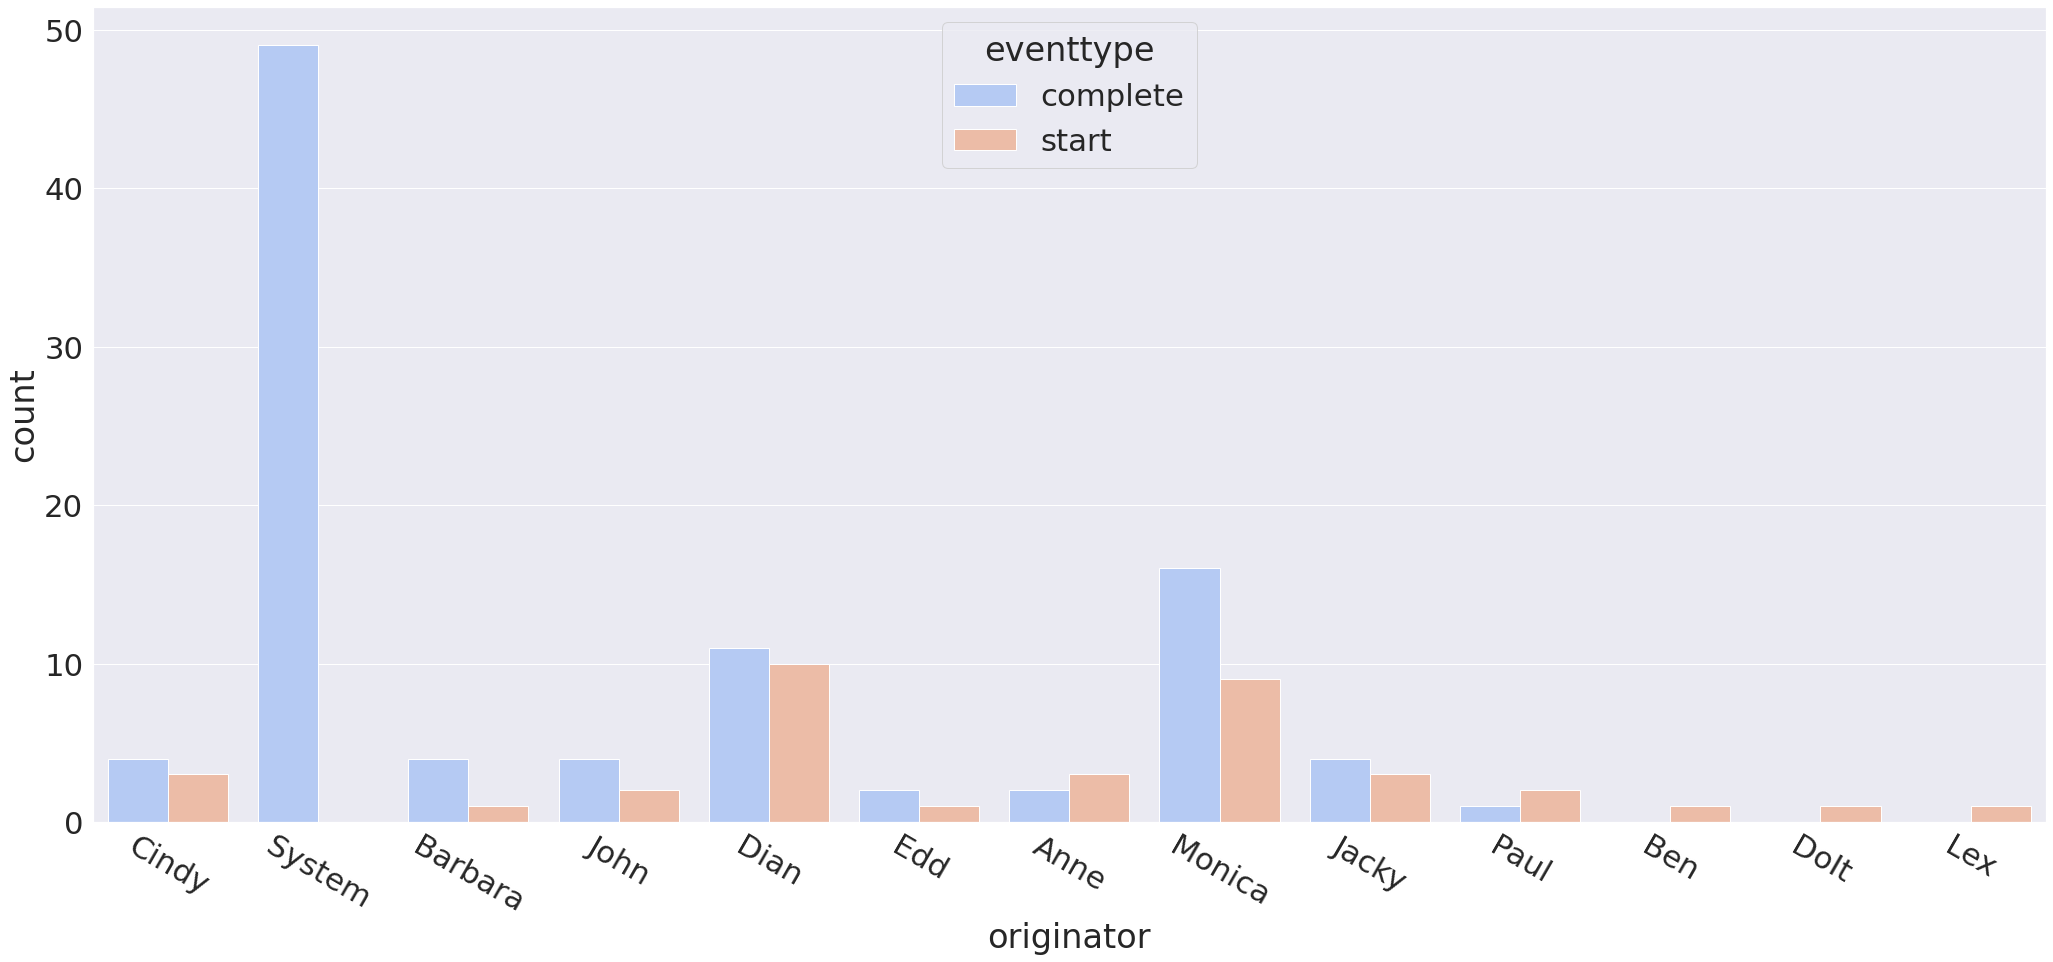

In [ ]:
# 업무 담당자 
sns.set(rc={'figure.figsize':(35,15)},font_scale = 2.8)
sns.countplot(data=df, x = "originator", hue = "eventtype", palette = 'coolwarm')
plt.xticks(rotation = -30 )
plt.savefig("name.png",dpi=400, bbox_inches='tight')

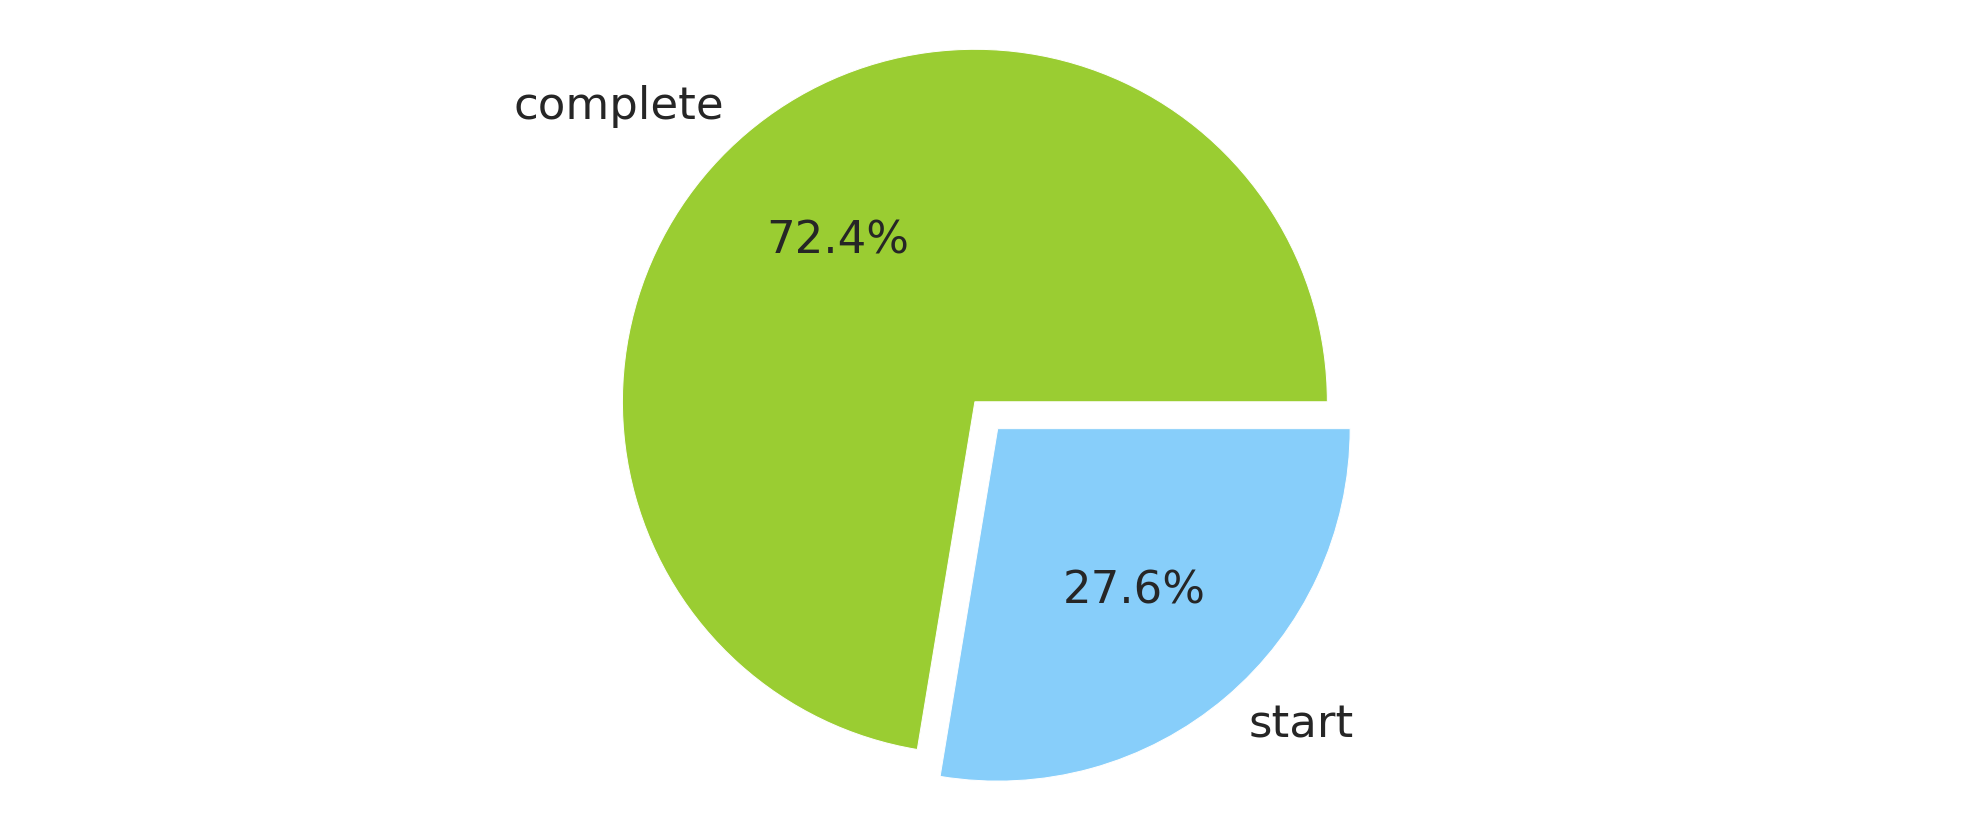

In [ ]:
# 업무 시작 및 끝 (%) 
colors = ['yellowgreen','lightskyblue']
explodes = (0.1,0)

labels = df['eventtype'].astype('category').cat.categories.tolist()
counts = df['eventtype'].value_counts()
size = [counts[var_cat] for var_cat in labels]
f,ax = plt.subplots()
ax.pie(size, labels=labels, autopct='%1.1f%%', textprops={'fontsize':45}, colors = colors, explode = explodes)
ax.axis('equal')
plt.show()

O    123
B      5
E      4
P      2
Name: RepairType, dtype: int64


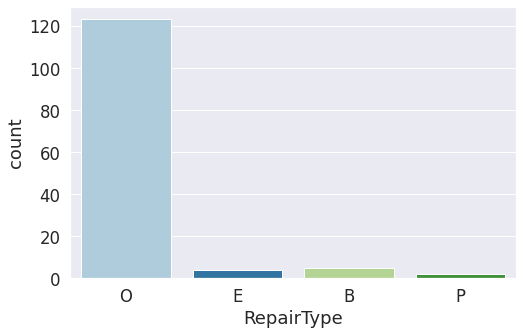

In [ ]:
# 수리방식 합계
print(df['RepairType'].value_counts())
plt.figure(figsize=(8,5))
sns.set_palette("Paired")
sns.countplot(data = df , x = 'RepairType')
plt.show()

Nope        126
Personal      3
Letter        2
Phone         2
Web           1
Name: contact, dtype: int64


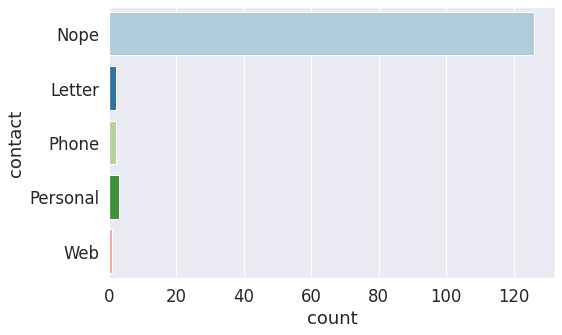

In [ ]:
# 집 수리 요청의 요청 채널 
print(df['contact'].value_counts())
sns.set(rc={'figure.figsize':(8,5)},font_scale = 1.5)
sns.set_palette("Paired")
sns.countplot(data = df , y = 'contact')
plt.show()

In [ ]:
df.head(5)

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
0,547,InternRepair,Cindy,complete,Nope,O,0.0,False,0.0,0.0,False,2022-01-01,15:44
1,387,SendTicketToFinAdmin,System,complete,Nope,O,0.0,False,0.0,0.0,False,2022-01-02,18:51
2,660,Survey,Barbara,complete,Nope,O,0.0,True,120.0,1.0,False,2022-01-03,7:57
3,818,Survey,John,start,Nope,O,0.0,False,0.0,0.0,False,2022-01-04,6:25
4,805,SendTicketToFinAdmin,System,complete,Nope,O,0.0,False,0.0,0.0,False,2022-01-05,16:58


In [ ]:
#내부 수리 및 수리 정상 종류 여부
import plotly.graph_objects as go

#df에 있는 'RepairInternally'그리고 'RepairOK' 데이터들을 가져오기 
bb = df[['RepairInternally','RepairOK']]
bb_dt = pd.DataFrame(bb)
bb_dt.head(5)

,RepairInternally,RepairOK
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [ ]:
bb_dt.replace("False",0,inplace=True)
bb_dt.replace("True",1,inplace=True)

bb_dt.head(5)

,RepairInternally,RepairOK
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [ ]:
import plotly.graph_objects as go

L  = len(bb_dt)

fig1 = go.Figure(data=[go.Bar(x=['RepairInternally',  'RepairOK'], 
                              y =[bb_dt['RepairInternally'].sum(),
                                  bb_dt['RepairOK'].sum() ], 
                                  name='True'),
                       go.Bar(x=['RepairInternally','RepairOK'], 
                              y =[L-bb_dt['RepairInternally'].sum(),
                                  L-bb_dt['RepairOK'].sum()], 
                                  name='False')])


fig1.update_layout(barmode='stack',   bargap=0.07, width=600, height=400)

In [3]:
# 작년 1월1일부터 5월 14일까지의 데이터 불러오기 

liks = "https://raw.githubusercontent.com/annsyj94/Short-Data-Analysis-/main/year.csv"
df3 = pd.read_csv(liks)

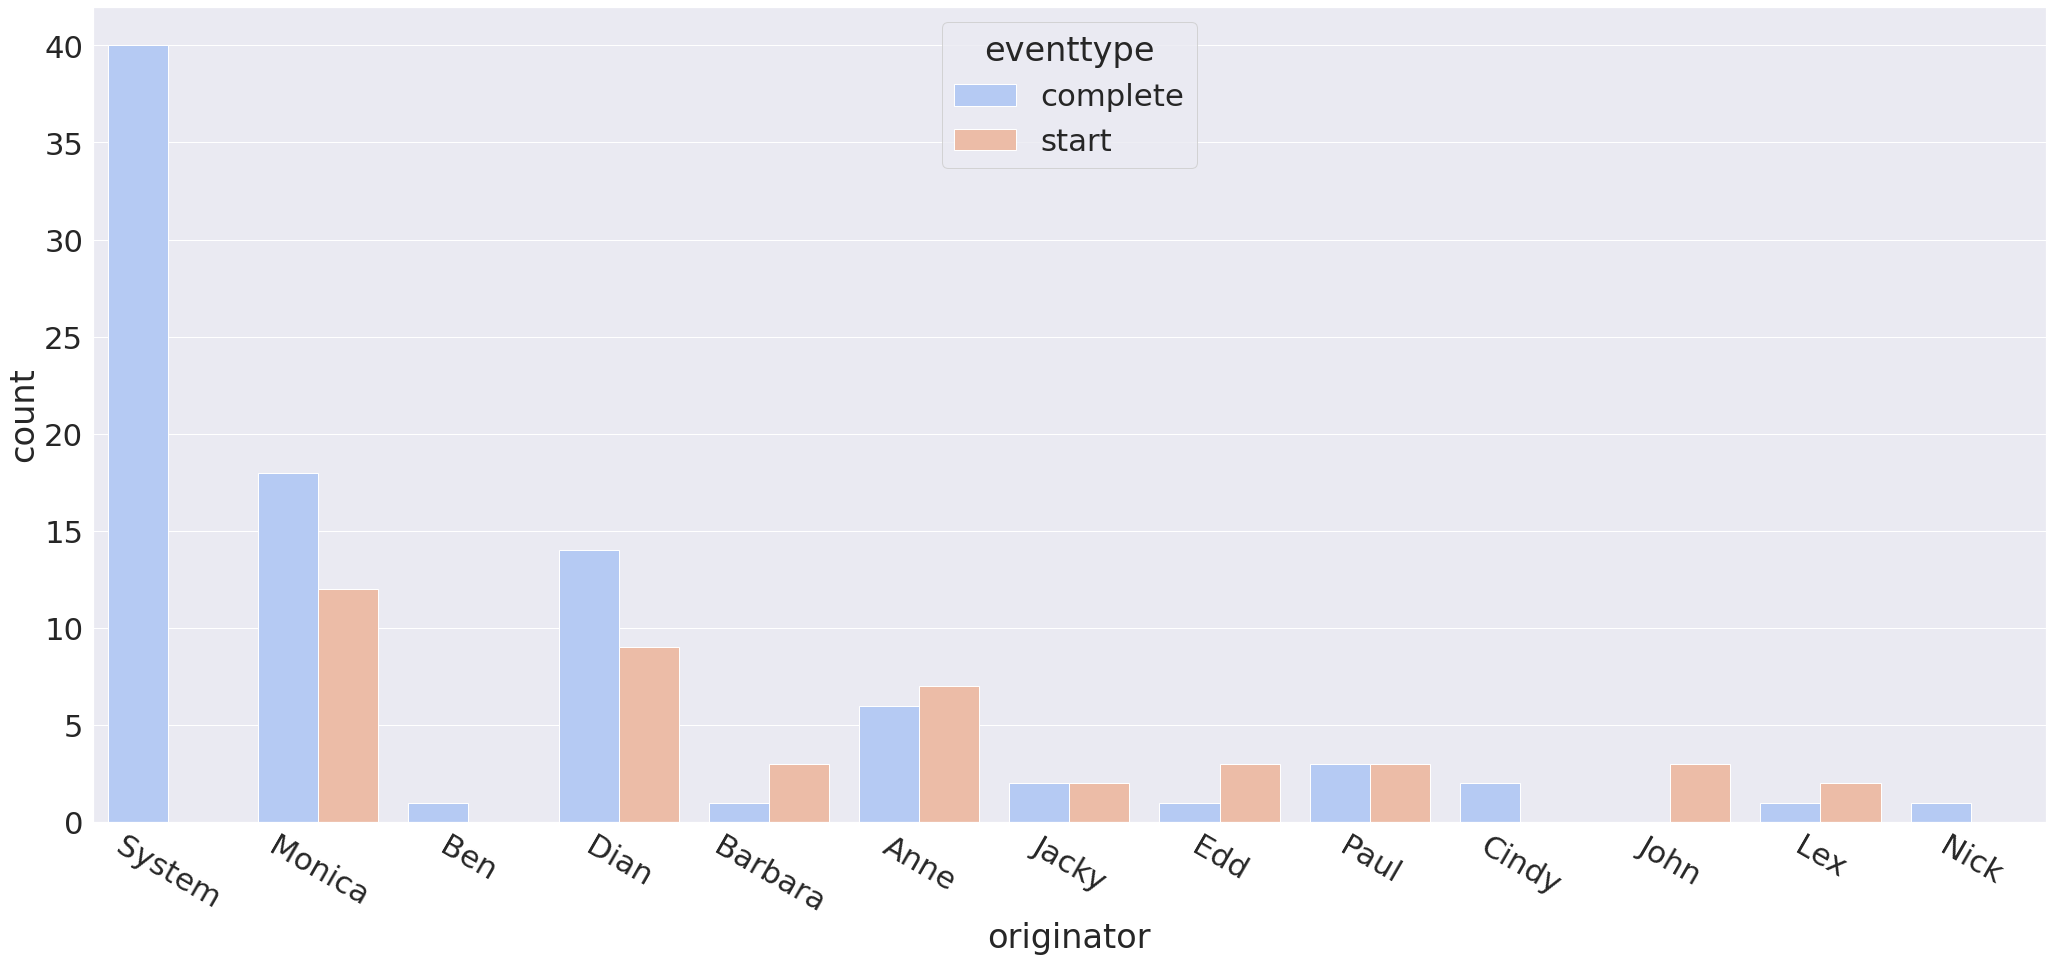

In [5]:
# 업무 담당자 (2021.1.1~2021.5.14)
sns.set(rc={'figure.figsize':(35,15)},font_scale = 2.8)
sns.countplot(data=df3, x = "originator", hue = "eventtype", palette = 'coolwarm')
plt.xticks(rotation = -30 )
plt.savefig("name.png",dpi=400, bbox_inches='tight')